
==================== Linear Kernel ====================
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



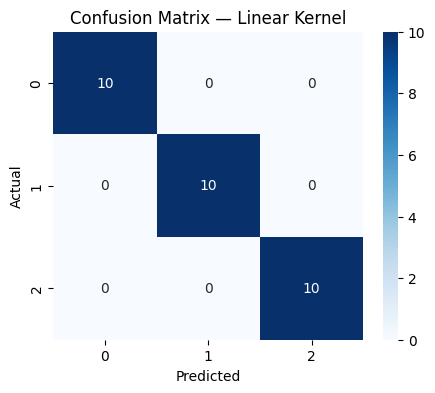


==================== Polynomial Kernel ====================
Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



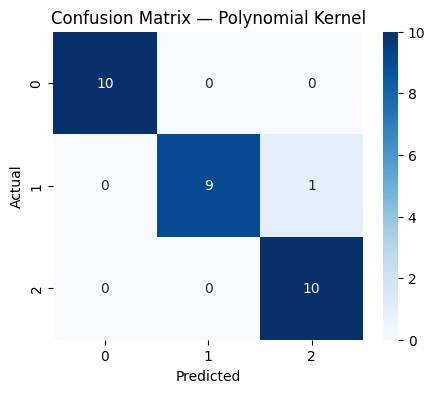


==================== RBF Kernel ====================
Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



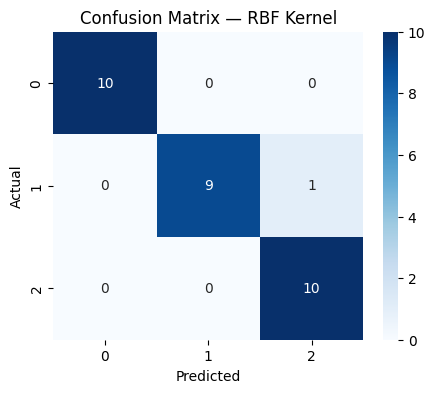


🔥 Best Performing Kernel: Linear


In [ ]:


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# a) Load dataset and train-test split
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Different kernels
kernels = {
    "Linear": SVC(kernel="linear"),
    "Polynomial": SVC(kernel="poly", degree=3),
    "RBF": SVC(kernel="rbf")
}

results = {}

for name, model in kernels.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n==================== {name} Kernel ====================")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    results[name] = accuracy_score(y_test, y_pred)

    # Confusion Matrix Plot
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix — {name} Kernel")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Best kernel
best_kernel = max(results, key=results.get)
print("\n🔥 Best Performing Kernel:", best_kernel)


In [ ]:


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# A) Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

svm_no_scale = SVC(kernel="rbf")
svm_no_scale.fit(X_train, y_train)

train_acc_no = svm_no_scale.score(X_train, y_train)
test_acc_no = svm_no_scale.score(X_test, y_test)

print("\n=== SVM WITHOUT SCALING ===")
print("Train Accuracy:", train_acc_no)
print("Test Accuracy:", test_acc_no)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

svm_scaled = SVC(kernel="rbf")
svm_scaled.fit(X_train_scaled, y_train)

train_acc_s = svm_scaled.score(X_train_scaled, y_train)
test_acc_s = svm_scaled.score(X_test_scaled, y_test)

print("\n=== SVM WITH SCALING ===")
print("Train Accuracy:", train_acc_s)
print("Test Accuracy:", test_acc_s)



=== SVM WITHOUT SCALING ===
Train Accuracy: 0.9186813186813186
Test Accuracy: 0.9298245614035088

=== SVM WITH SCALING ===
Train Accuracy: 0.9824175824175824
Test Accuracy: 0.9824561403508771
